<a href="https://colab.research.google.com/github/Samanthaavilac/Taller_2/blob/main/Taller_2_%C3%81vila_Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 2 
Integrantes:

*   María Paula Vargas Galindo (Grupo 105)
*   Samantha Ávila Celestino 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy as cp

1. La empresa XYZ produce dos productos: A y B. La ganancia por unidad de A es de 3 dólares y es de B es de 5 dólares. Para su producción dispone de 500 unidades de materia 
prima, 1000 unidades de mano de obra y 2000 dólares de capital, de los cuales se 
necesitan para producir una unidad de:

i) A: una unidad de materia prima, dos unidades de mano de obra y una unidad de capital.

ii) B: una unidad de materia prima, cuatro unidades de mano de obra y dos unidades de 
capital.

Además, se necesita producir al menos 100 unidades de A y 150 unidades de B para 
satisfacer la demanda del mercado. 

Encuentre la asignación óptima de A y B que maximizan las ganancias de la empresa.

Para ello, formule un problema de LP utilizando Scipy.

In [ ]:
c = np.array([3, 5])

A = np.array([[1, 1],
                  [2,4],
                    [1,2]])
B = np.array([5000,1000,2000])

#Asignación óptima de A y B 
sol1 = linprog(-c, A_ub=A, b_ub=B,method='revised simplex')
sol1
pd.DataFrame(sol1.x).round(4).T

<ipython-input-6-d5740d805d23>:10: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol1 = linprog(-c, A_ub=A, b_ub=B,method='revised simplex')


,0,1
0,500.0,0.0


2. Usted desea invertir la suma de $100 millones en cuatro fondos que tienen diferentes 
retornos esperados (𝑬(𝑹)), así como diferentes ponderaciones en acciones de alto valor, 
gran tamaño y alta liquidez, como muestra la siguiente tabla:
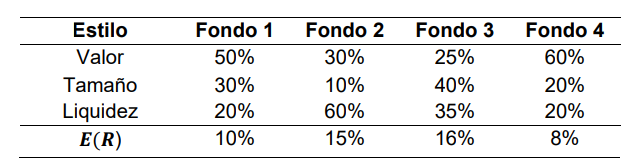

La asignación anterior debe contener al menos un 35% de acciones de alto valor, un 30% 
en tamaño y un 15% de acciones de liquidez. Encuentre una asignación factible con el 
retorno esperado más alto, bajo el supuesto de que solo se le permite mantener posiciones 
largas en los fondos. 
Formule y resuelva el problema de LP considerando las siguientes restricciones:

0.5 𝑥1 + 0.3 𝑥2 + 0.25 𝑥3 + 0.6 𝑥4 ≥ 0.35 (valor)

0.3 𝑥1 + 0.1 𝑥2 + 0.4 𝑥3 + 0.2 𝑥4 ≥ 0.30 (tamaño)

0.2 𝑥1 + 0.6 𝑥2 + 0.35 𝑥3 + 0.2 𝑥4 ≥ 0.15 (liquidez)

𝑥1 + 𝑥2 + 𝑥3 + 𝑥4 = $100

𝑥1, 𝑥2, 𝑥3, 𝑥4 ≥ 0

Nota: resuelva el problema anterior usando las librerías de Scipy y CVXPY de Python.

In [ ]:
#Linprog
c=np.array([0.10,0.15,0.16,0.08])

A_ub= np.array([[0.5,0.3,0.25,0.6],
                [0.3,0.1,0.4,0.2],
                [0.2,0.6,0.35,0.2]])

b_ub=np.array([0.35,0.30,0.15])

A_eq=np.array([(1,1,1,1)])
b_eq=np.array([1])

#Asignazción factible 
sol=linprog(-c,A_ub=-A_ub,b_ub=-b_ub,A_eq=A_eq,b_eq=b_eq,method="simplex")
pd.DataFrame(sol.x).round(4).T


<ipython-input-15-b5ea3daf2016>:14: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol=linprog(-c,A_ub=-A_ub,b_ub=-b_ub,A_eq=A_eq,b_eq=b_eq,method="simplex")


,0,1,2,3
0,0.0,0.1579,0.5789,0.2632


In [ ]:
sol= sol.fun
sol

-0.13736842105263158

In [ ]:
#CVXPY
n=4
x = cp.Variable(n)
objetivo= cp.Minimize(-c.T@x)
restricciones=[cp.sum(x)==1,A_ub@x >=b_ub,x>=0]
prob=cp.Problem(objetivo,restricciones)
result=prob.solve()

sol2=pd.DataFrame(x.value)
pd.DataFrame(sol2).round(4).T

# Print result.
print("\El mejor retorno y la mejor asignación es/", prob.value)
print(round(pd.DataFrame(x.value),4))


\El mejor retorno y la mejor asignación es/ -0.13736842087092851
        0
0  0.0000
1  0.1579
2  0.5789
3  0.2632


3. La empresa XYZ se enfrente al siguiente problema de manejo de efectivo. Las cifras 
están expresadas en millones ($).
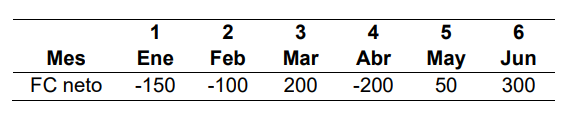

Además, se sabe que la empresa cuenta con las siguientes fuentes de recursos:

• Una línea de crédito de hasta $100 a una tasa de interés del 1% mensual.

• Puede emitir papel comercial a 90 días con un interés total del 2% por un período 
de 3 meses.

• Todos los meses se pueden invertir los fondos sobrantes a una tasa de interés del 
0,3% mensual. Por ejemplo, la empresa podría hacer un depósito bancario que le 
reconoce esa tasa. 

Sobre este problema, la empresa desea saber si: ¿usar la línea de crédito en algunos de los meses le representa un alto costo? si es así ¿cuándo debería usarla? ¿cuánto cuesta? 
¿qué pagos de intereses tendrá que hacer entre enero y junio? etc… Para responder a 
estos interrogantes, la empresa puede formular y resolver un problema de LP. Para la 
formulación del problema tener en cuenta lo siguiente:

Variables:

𝒙𝒋
: monto dispuesto a pedir en la línea de crédito en el mes j, para j = 1,2,3,4,5.

𝒚𝒋
: monto emitido en el papel comercial en el mes j, para j = 1,2,3.

𝒛𝒋
: saldo de fondos (FC) en el mes j, para j = 1,2,3,4,5,6.

Objetivo: Maximizar el saldo de los fondos (FC) en el mes 6 (Jun):
𝑚á𝑥 𝒛𝟔

Restricciones: Restricciones de los saldos en cada mes y límites en 𝒙𝒋
, 𝒚𝒋 y 𝒛𝒋.

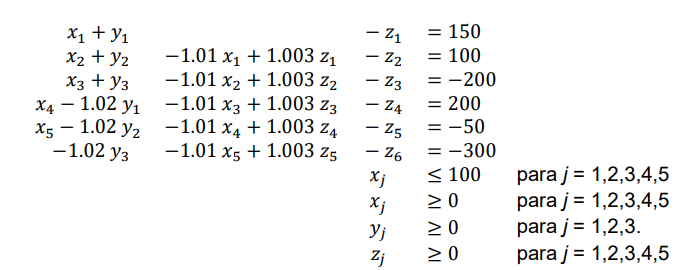

Nota: resuelva el problema anterior usando las librerías de Scipy y CVXPY de Python. 

In [ ]:
c3= np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1])
A3= np.array([[1,0,0,0,0,1,0,0,-1,0,0,0,0,0],
              [-1.01,1,0,0,0,0,1,0,1.003,1,0,0,0,0],
              [0,-1.01,1,0,0,0,0,1,0,1.003,-1,0,0,0],
              [0,0,-1.01,1,0,-1.02,0,0,0,0,1.003,-1,0,0],
              [0,0,0,-1.01,1,0,-1.02,0,0,0,0,1.003,-1,0],
              [0,0,0,0,-1.01,0,0,-1.02,0,0,0,0,1.003,-1]
              ])
b3=np.array([150,100,-200,200,-50,-300])
bouns=[(0,100),
       (0,100),
       (0,100),
       (0,100),
       (0,100),
       (0,None),
       (0,None),
       (0,None),
       (0,None),
       (0,None),
       (0,None),
       (0,None),
       (0,None),
       (0,None)]
res=linprog(-c3,A_eq=A3, b_eq=b3,
            bounds=bouns,method="revised simplex")
res.x

<ipython-input-16-8cd35c1bc7e1>:24: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res=linprog(-c3,A_eq=A3, b_eq=b3,


array([100.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  50.        ,   0.        ,   0.        ,
         0.        , 201.        , 401.603     , 151.807809  ,
       202.26323243, 502.87002212])

4. La empresa XYZ desea encontrar el saldo óptimo que debe mantener en su cuenta 
bancaria en un horizonte de un mes buscando maximizar su rentabilidad total. Se sabe 
que la empresa espera recibir entradas de efectivo de: 500 en la primera semana, 300 
en la segunda semana, 200 en la tercera semana y $400 en la cuarta semana. Todas las 
cifras se encuentran en millones de pesos. Además, la empresa debe realizar los 
siguientes pagos durante el mes: 350 en la primera semana, $400 en la segunda 
semana, 250 en la tercera semana y 200 en la cuarta semana y, para ello, debe 
mantener un saldo suficiente que respalde estas obligaciones. 

Para aprovechar la rentabilidad que ofrecen los saldos en cada momento, la empresa 
puede invertir sus recursos en un instrumento a corto plazo en el que recibe un 
rendimiento del 0,02% por día, pero al realizar esta operación debe incurrir en un costo de 
transacción del 0,01% del monto transferido.

Formule un problema de LP utilizando Scipy que le permita maximizar la rentabilidad total
de los saldos en su cuenta teniendo en cuenta las restricciones de sus flujos de efectivo.

In [ ]:
Fobjetivo=np.array([0,0,0,0,0,0,0,1])
Rest=(1+0.0001)**7
A4=np.array([[1,0,0,0,-1,0,0,0],
             [0,1,0,0,Rest,-1,0,0],
             [0,0,1,0,0,Rest,-1,0],
             [0,0,0,1,0,0,Rest,-1]])
b4=np.array([[150,-100,-50,200]])
#Máximizar la rentabilidad 
opt=linprog(-Fobjetivo, A_ub=A4, b_ub=-b4, method='simplex')
Voptimo=pd.DataFrame(opt.x).T 
Voptimo.round(2)



<ipython-input-22-1e9a8a25bf13>:9: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt=linprog(-Fobjetivo, A_ub=A4, b_ub=-b4, method='simplex')


,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,150.0,50.11,0.14,200.14


In [ ]:
Vmax= -opt.fun
Vmax

200.14021366142958

5. La empresa XYZ tiene que decidir como distribuye su presupuesto $10.000 millones y la 
mano de obra (horas de trabajo) en tres departamentos: ventas, marketing y producción
buscando maximizar sus ganancias. Para ello, se sabe que cada departamento le 
proporciona a la empresa las siguientes ganancias: ventas: $5, marketing: 8$, y 
producción: $10. Esta asignación debe cumplir las siguientes restricciones:

i. El total de horas de trabajo disponibles es de 1.000.

ii. El departamento de ventas debe recibir al menos el 20% del presupuesto total.

iii. El departamento de marketing debe recibir al menos el 30% del total de horas de 
trabajo disponibles. 

iv. El departamento de producción debe recibir al menos el 25% del total de horas de 
trabajo disponibles.
 
Formule un problema de LP utilizando Scipy que le permita maximizar

In [ ]:
c5=np.array([0,0,0,5,8,10])
A5=np.array([[0,0,0,1,0,0],
            [0,1,0,0,0,0],
            [0,0,1,0,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,1]])
b5=np.array([2000,300,250,2000,2000])

A6=np.array([[1,1,1,0,0,0],[0,0,0,1,1,1]])
b6=np.array([1000,10000])
sol5=linprog(-c5,A_ub=-A5,b_ub=-b5,A_eq=A6,b_eq=b6,method="simplex")
print(round(pd.DataFrame(sol5.x),2))

        0
0   450.0
1   300.0
2   250.0
3  2000.0
4  2000.0
5  6000.0


<ipython-input-25-804698b5fae6>:11: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol5=linprog(-c5,A_ub=-A5,b_ub=-b5,A_eq=A6,b_eq=b6,method="simplex")


6. Considere una empresa con tres puntos potenciales para ubicar sus instalaciones (𝐽 =
{1,2,3}) y cinco puntos de demanda que debe satisfacer (𝐼 = {1,2,3,4,5}). La apertura del
punto 𝑗 ∈ 𝐽 tiene un costo fijo de funcionamiento 𝑓𝑗
, independientemente del volumen de 
ventas que maneje. Este volumen está limitado a una determinada cantidad máxima que 
puede manejarse anualmente (𝑀𝑗
). Además, hay un costo de transporte 𝑐𝑖𝑗 para ir desde el 
punto 𝑗 para abastecer la demanda en el punto 𝑖. Las siguientes tablas muestran los datos 
de demanda en cada punto:

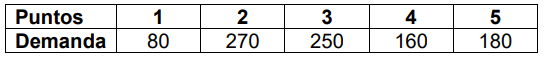

Y los costos de transporte, de funcionamiento y cantidad máxima que puede mantener en 
cada

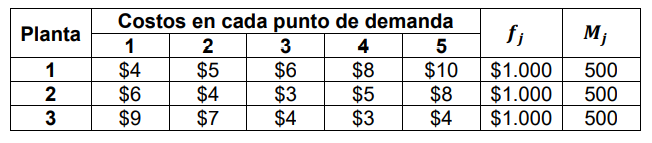

Las columnas 1-5 muestran el costo de transporte desde cada punto instalado (planta) a 
cada demanda que debe satisfacer. Las columnas 𝑓𝑗 y 𝑀𝑗 muestran los costos fijos y la 
capacidad máxima en cada ubicación. Encuentre la ubicación óptima para satisfacer las 
demandas de tal forma que se minimicen los costos.

Formule un problema de optimización utilizando Scipy que le permita encontrar la 
estrategia optima de la empresa para reducir sus costos de funcionamiento y transporte. 
